In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')

print(f"Dataset loaded: {df.shape[0]:,} rows x {df.shape[1]} columns")
df.head()


Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset.csv
Saving DescriptionDataCoSupplyChain.csv to DescriptionDataCoSupplyChain.csv
Saving tokenized_access_logs.csv to tokenized_access_logs.csv
Dataset loaded: 180,519 rows x 53 columns


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [2]:
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print()
df.dtypes

Rows: 180,519
Columns: 53



,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


In [3]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Product Description,180519
Order Zipcode,155679
Customer Lname,8
Customer Zipcode,3


In [4]:
print(f"Duplicate rows: {df.duplicated().sum():,}")

Duplicate rows: 0


In [5]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)
print("Columns renamed:")
print(df.columns.tolist())

Columns renamed:
['type', 'days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order', 'sales_per_customer', 'delivery_status', 'late_delivery_risk', 'category_id', 'category_name', 'customer_city', 'customer_country', 'customer_email', 'customer_fname', 'customer_id', 'customer_lname', 'customer_password', 'customer_segment', 'customer_state', 'customer_street', 'customer_zipcode', 'department_id', 'department_name', 'latitude', 'longitude', 'market', 'order_city', 'order_country', 'order_customer_id', 'order_date_dateorders', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total', 'order_profit_per_order', 'order_region', 'order_state', 'order_status', 'order_zipcode', 'product_card_id', 'product_category_id', 'product_description', 'product_image', 'product_name', 'product_price', 'product_status', 'shipping_dat

In [6]:
cols_to_drop = ['customer_email', 'customer_password', 'product_image']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print(f"Remaining columns: {df.shape[1]}")

Remaining columns: 50


In [7]:
date_cols = [col for col in df.columns if 'date' in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
print("Date columns converted:")
print(df[date_cols].dtypes)

Date columns converted:
order_date_dateorders       datetime64[ns]
shipping_date_dateorders    datetime64[ns]
dtype: object


In [8]:
df['shipping_delay_days'] = df['days_for_shipping_real'] - df['days_for_shipment_scheduled']
df['order_month'] = df['order_date_dateorders'].dt.to_period('M')
df['order_year'] = df['order_date_dateorders'].dt.year
df['order_day_of_week'] = df['order_date_dateorders'].dt.day_name()

import numpy as np
df['profit_margin_pct'] = np.where(
    df['sales'] != 0,
    (df['order_profit_per_order'] / df['sales'] * 100).round(2),
    0
)
print("New columns added:")
print(df[['shipping_delay_days', 'order_month', 'order_year', 'profit_margin_pct']].head())

New columns added:
   shipping_delay_days order_month  order_year  profit_margin_pct
0                   -1     2018-01        2018              27.84
1                    1     2018-01        2018             -76.00
2                    0     2018-01        2018             -75.60
3                   -1     2018-01        2018               6.97
4                   -2     2018-01        2018              40.95


In [9]:
df.to_csv('dataco_cleaned.csv', index=False)
print(f"Cleaned dataset saved: {df.shape[0]:,} rows x {df.shape[1]} columns")

Cleaned dataset saved: 180,519 rows x 55 columns


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")

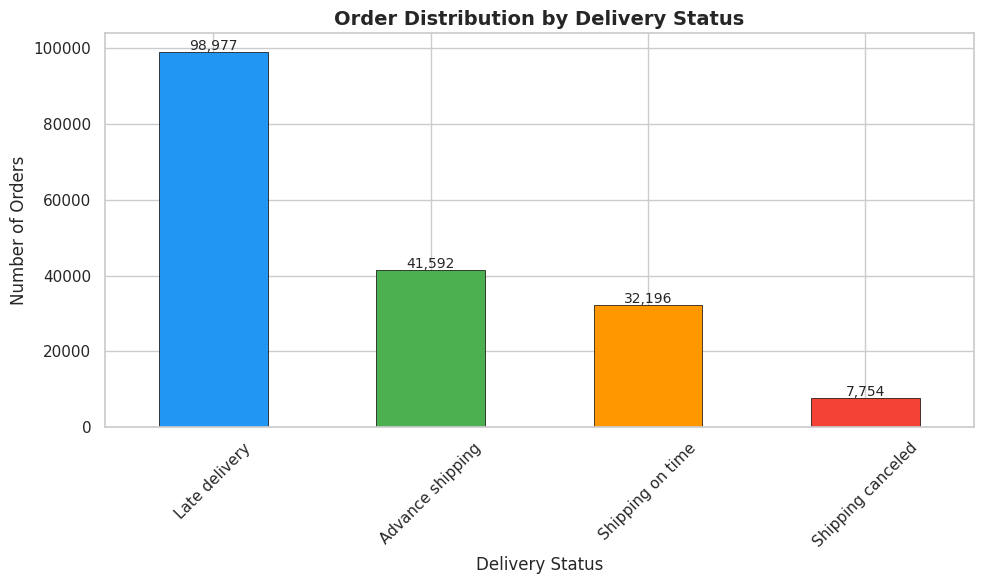

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
counts = df['delivery_status'].value_counts()
colors = ['#2196F3', '#4CAF50', '#FF9800', '#F44336']
counts.plot(kind='bar', ax=ax, color=colors[:len(counts)], edgecolor='black', linewidth=0.5)
ax.set_title('Order Distribution by Delivery Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Delivery Status')
ax.set_ylabel('Number of Orders')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(counts.values):
    ax.text(i, v + 500, f'{v:,}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

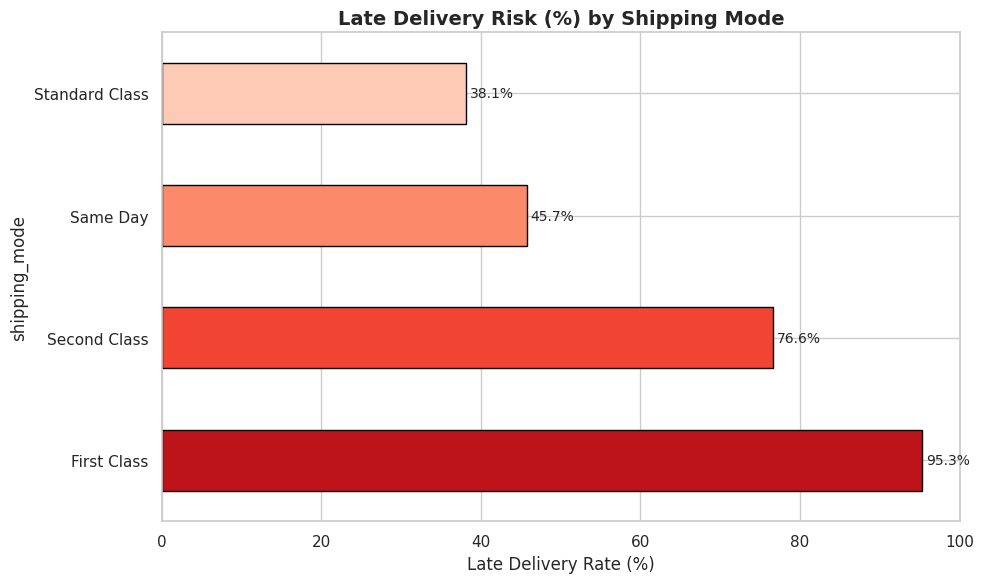

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
late_rate = df.groupby('shipping_mode')['late_delivery_risk'].mean().sort_values(ascending=False) * 100
late_rate.plot(kind='barh', ax=ax, color=sns.color_palette("Reds_r", len(late_rate)), edgecolor='black')
ax.set_title('Late Delivery Risk (%) by Shipping Mode', fontsize=14, fontweight='bold')
ax.set_xlabel('Late Delivery Rate (%)')
for i, v in enumerate(late_rate.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)
plt.tight_layout()
plt.show()

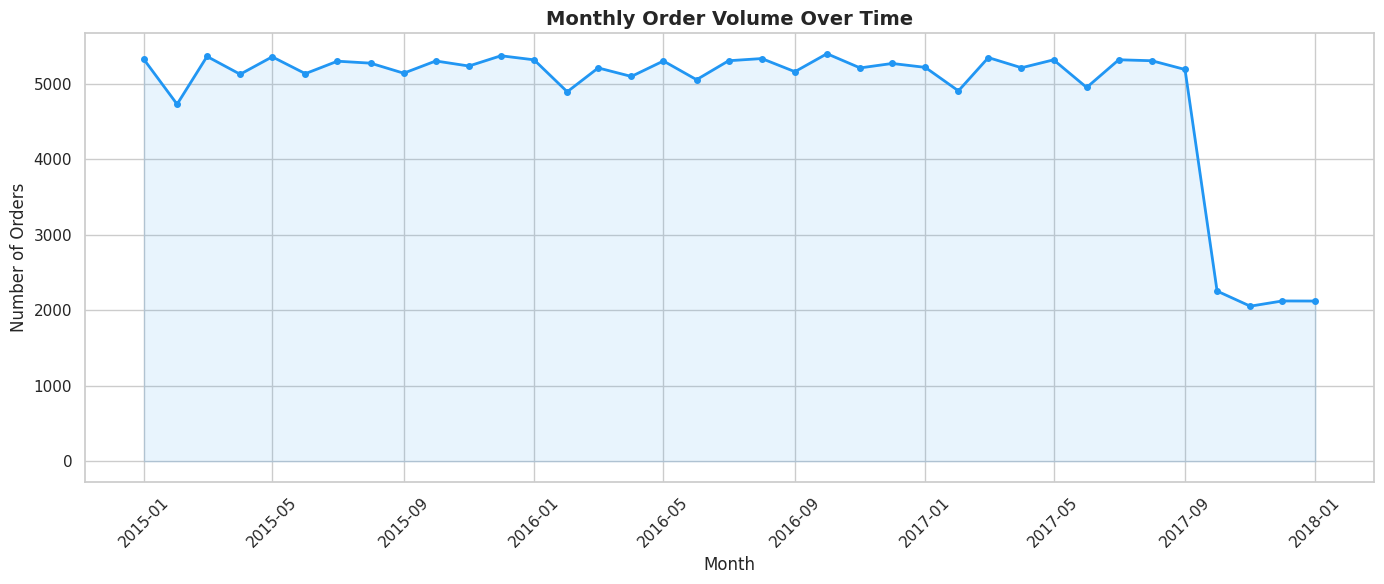

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
monthly = df.groupby('order_month').size()
monthly.index = monthly.index.to_timestamp()
ax.plot(monthly.index, monthly.values, marker='o', linewidth=2, markersize=4, color='#2196F3')
ax.fill_between(monthly.index, monthly.values, alpha=0.1, color='#2196F3')
ax.set_title('Monthly Order Volume Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

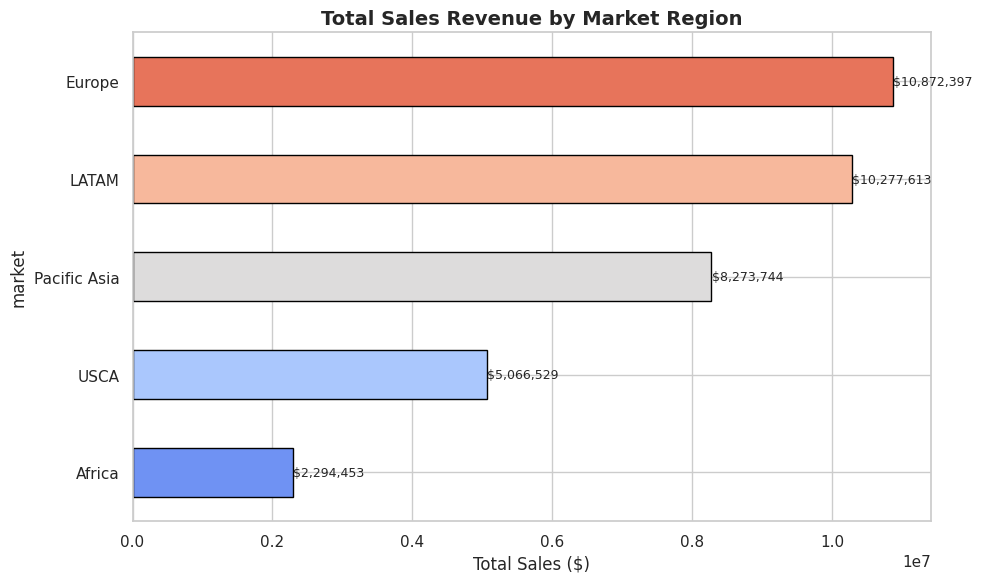

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
region_sales = df.groupby('market')['sales'].sum().sort_values()
region_sales.plot(kind='barh', ax=ax, color=sns.color_palette("coolwarm", len(region_sales)), edgecolor='black')
ax.set_title('Total Sales Revenue by Market Region', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Sales ($)')
for i, v in enumerate(region_sales.values):
    ax.text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

/tmp/ipython-input-443/1641465438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='category_name', y='order_profit_per_order', ax=ax, palette='viridis')


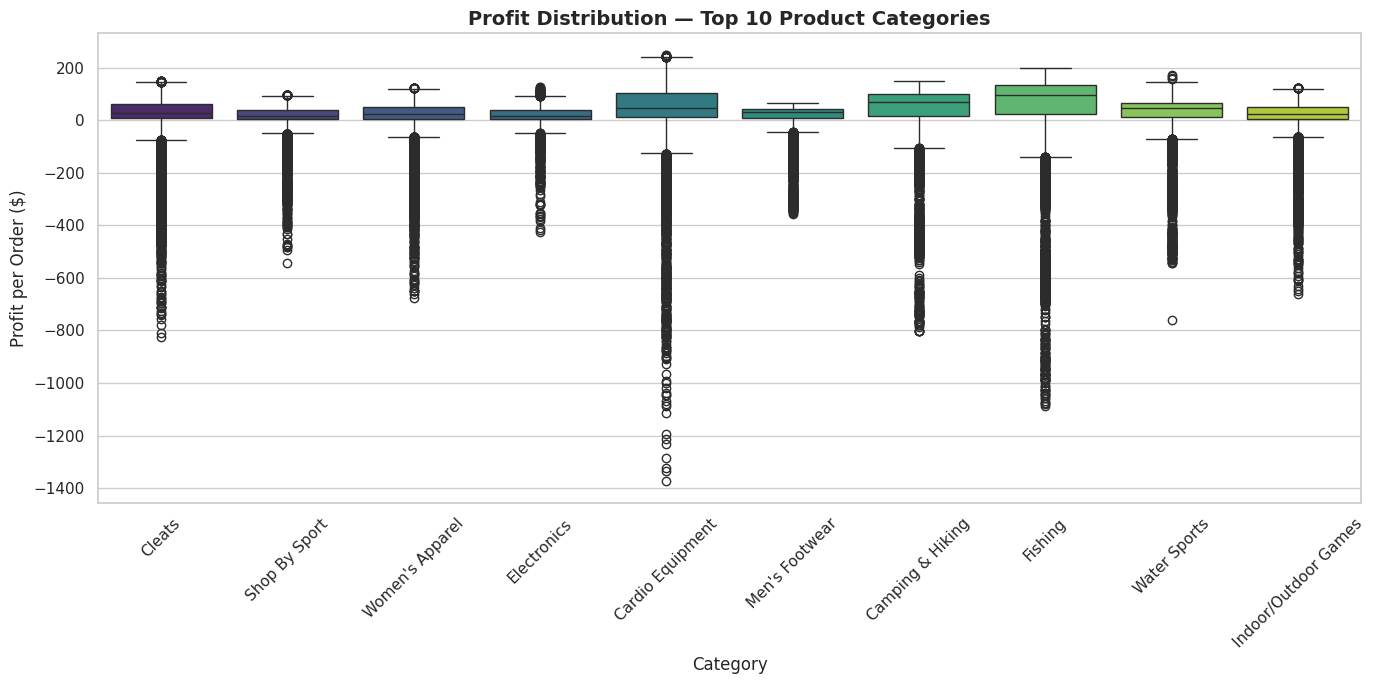

In [16]:
fig, ax = plt.subplots(figsize=(14, 7))
top_cats = df['category_name'].value_counts().head(10).index
subset = df[df['category_name'].isin(top_cats)]
sns.boxplot(data=subset, x='category_name', y='order_profit_per_order', ax=ax, palette='viridis')
ax.set_title('Profit Distribution — Top 10 Product Categories', fontsize=14, fontweight='bold')
ax.set_xlabel('Category')
ax.set_ylabel('Profit per Order ($)')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

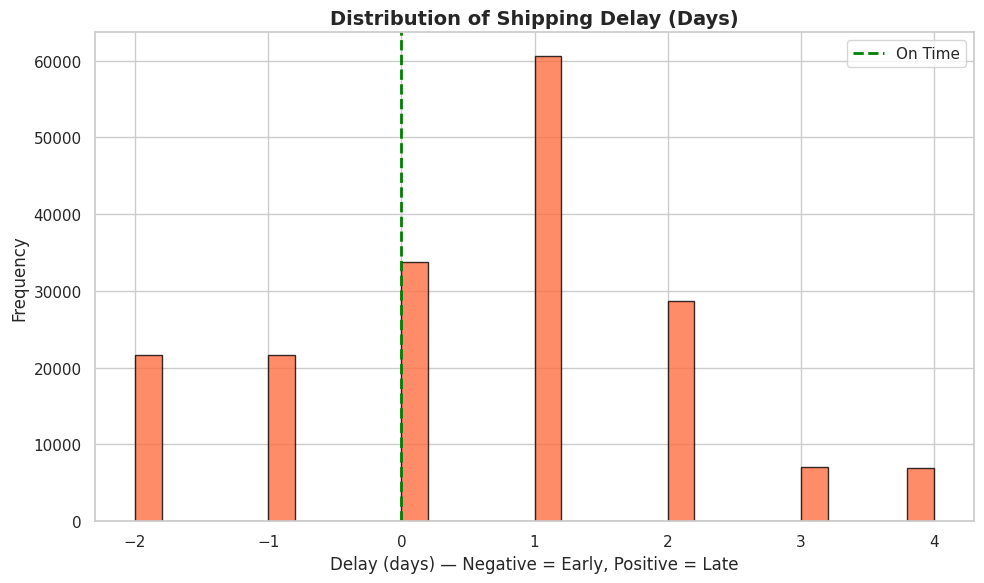

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['shipping_delay_days'], bins=30, color='#FF7043', edgecolor='black', alpha=0.8)
ax.axvline(x=0, color='green', linestyle='--', linewidth=2, label='On Time')
ax.set_title('Distribution of Shipping Delay (Days)', fontsize=14, fontweight='bold')
ax.set_xlabel('Delay (days) — Negative = Early, Positive = Late')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

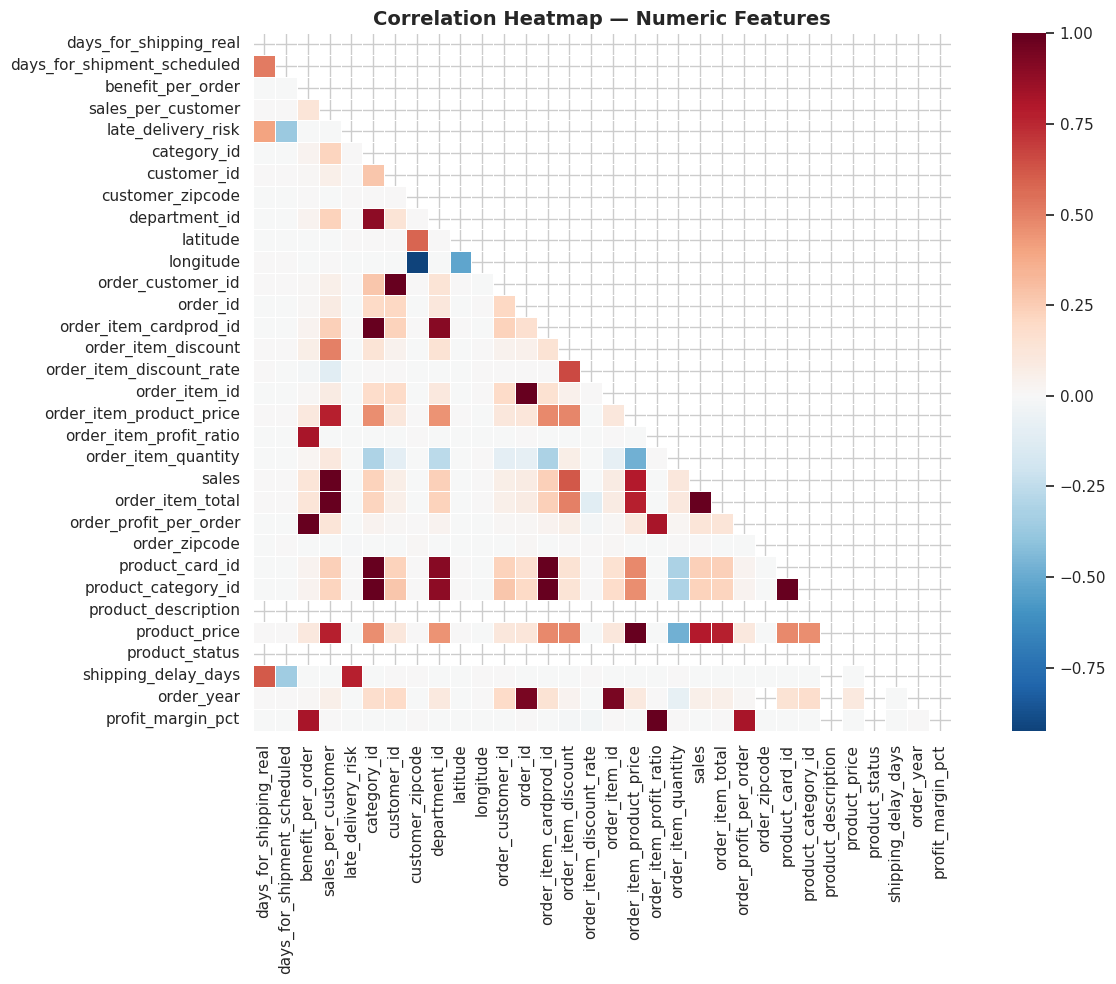

In [18]:
fig, ax = plt.subplots(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap — Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

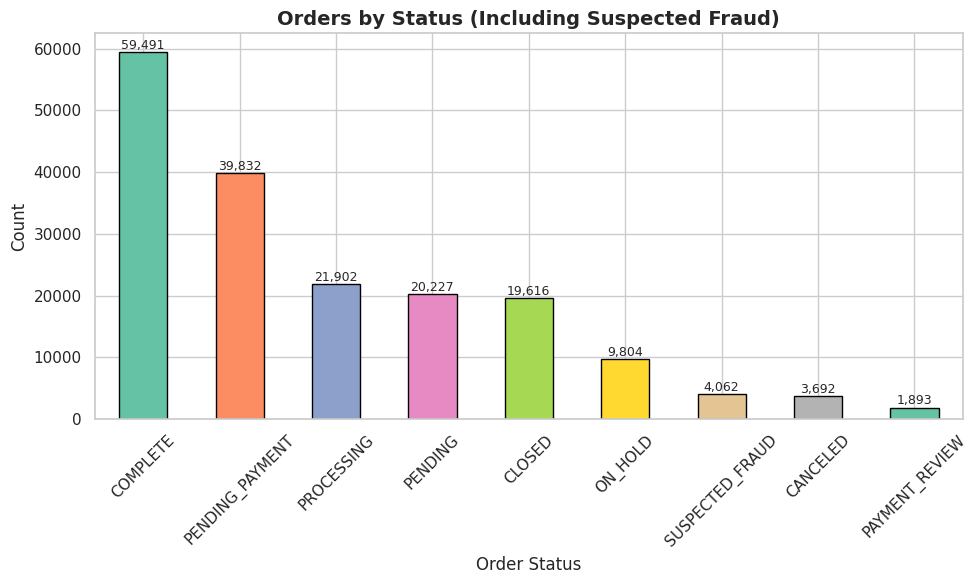

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
status_counts = df['order_status'].value_counts()
status_counts.plot(kind='bar', ax=ax, color=sns.color_palette("Set2", len(status_counts)), edgecolor='black')
ax.set_title('Orders by Status (Including Suspected Fraud)', fontsize=14, fontweight='bold')
ax.set_xlabel('Order Status')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(status_counts.values):
    ax.text(i, v + 500, f'{v:,}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

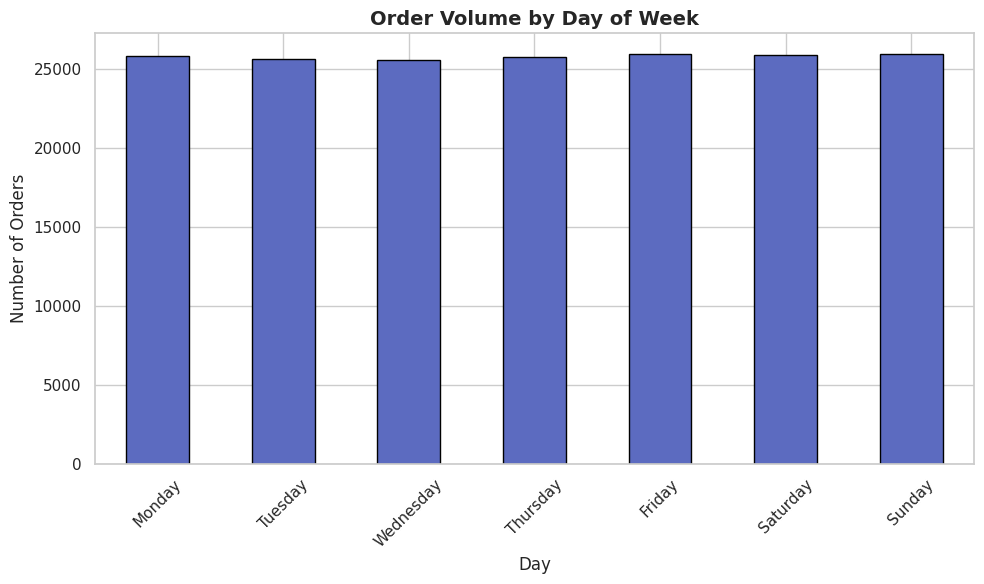

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['order_day_of_week'].value_counts().reindex(day_order)
day_counts.plot(kind='bar', ax=ax, color='#5C6BC0', edgecolor='black')
ax.set_title('Order Volume by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Orders')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

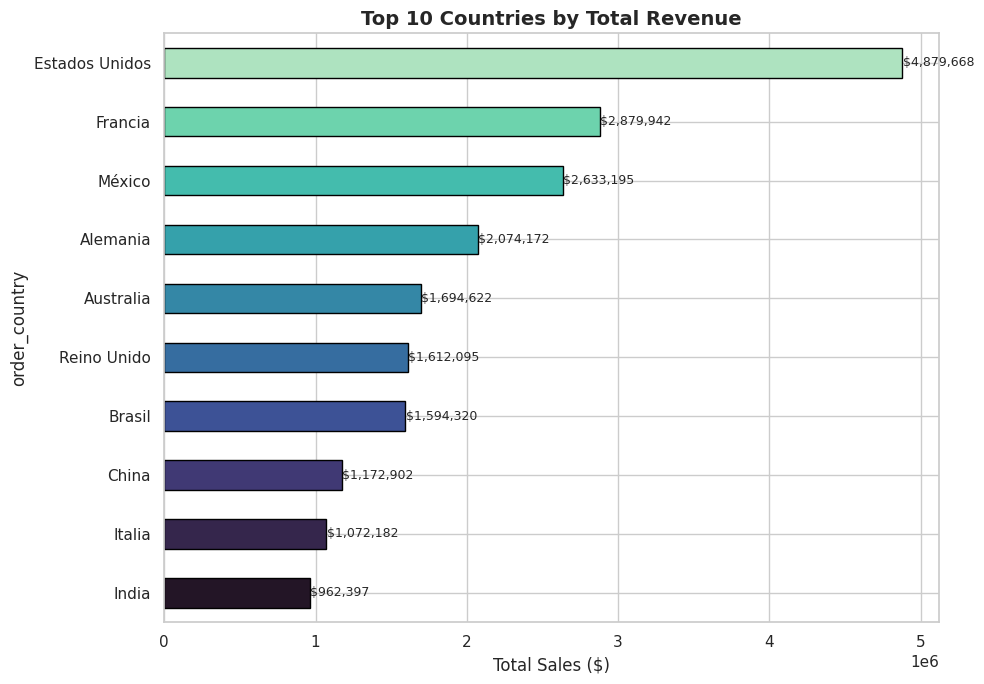

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
top_countries = df.groupby('order_country')['sales'].sum().sort_values(ascending=True).tail(10)
top_countries.plot(kind='barh', ax=ax, color=sns.color_palette("mako", 10), edgecolor='black')
ax.set_title('Top 10 Countries by Total Revenue', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Sales ($)')
for i, v in enumerate(top_countries.values):
    ax.text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

# Key Findings & Business Insights
## DataCo Smart Supply Chain — Exploratory Data Analysis

---

## Chart Purposes

**Delivery Status Distribution** — Shows the overall breakdown of how orders are being fulfilled, revealing whether the supply chain is meeting delivery commitments at a high level.

**Late Delivery Risk by Shipping Mode** — Identifies which shipping methods are most prone to delays, helping operations teams decide where to focus improvement efforts.

**Monthly Order Volume** — Tracks order trends over time to reveal seasonality, growth patterns, and any unusual spikes or drops that need investigation.

**Sales by Market Region** — Highlights which geographic markets generate the most revenue, guiding decisions about where to invest resources and expand operations.

**Profit by Product Category** — Compares profitability across product lines to identify which categories drive margins and which may be losing money.

**Shipping Delay Distribution** — Visualizes how far ahead or behind schedule deliveries are landing, showing whether scheduling estimates are accurate overall.

**Correlation Heatmap** — Reveals hidden relationships between numeric variables, surfacing patterns like the link between discounts and profit erosion before any modeling begins.

**Orders by Status (Fraud)** — Establishes the baseline fraud rate in the dataset, which is critical context for the fraud detection model built in Deliverable 3.

**Orders by Day of Week** — Uncovers weekly ordering patterns that inform staffing, warehouse capacity planning, and shipping logistics.

**Top 10 Countries by Revenue** — Identifies the highest-value markets at a country level, supporting decisions around regional shipping optimization and customer service investment.

In [22]:
total_orders = len(df)
late_pct = df['late_delivery_risk'].mean() * 100
on_time_pct = 100 - late_pct
avg_delay = df['shipping_delay_days'].mean()
total_revenue = df['sales'].sum()
avg_profit_margin = df['profit_margin_pct'].mean()
fraud_count = (df['order_status'] == 'SUSPECTED_FRAUD').sum()
fraud_pct = fraud_count / total_orders * 100
top_market = df.groupby('market')['sales'].sum().idxmax()
top_market_rev = df.groupby('market')['sales'].sum().max()
worst_shipping = df.groupby('shipping_mode')['late_delivery_risk'].mean().idxmax()
worst_shipping_pct = df.groupby('shipping_mode')['late_delivery_risk'].mean().max() * 100
negative_profit_pct = (df['order_profit_per_order'] < 0).mean() * 100
top_country = df.groupby('order_country')['sales'].sum().idxmax()

print("=" * 60)
print("KEY METRICS FOR FINDINGS")
print("=" * 60)
print(f"Total Orders: {total_orders:,}")
print(f"Late Delivery Rate: {late_pct:.1f}%")
print(f"On-Time Delivery Rate: {on_time_pct:.1f}%")
print(f"Average Shipping Delay: {avg_delay:.2f} days")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Suspected Fraud Orders: {fraud_count:,} ({fraud_pct:.1f}%)")
print(f"Top Market: {top_market} (${top_market_rev:,.2f})")
print(f"Worst Shipping Mode: {worst_shipping} ({worst_shipping_pct:.1f}% late)")
print(f"Orders with Negative Profit: {negative_profit_pct:.1f}%")
print(f"Top Country by Revenue: {top_country}")

KEY METRICS FOR FINDINGS
Total Orders: 180,519
Late Delivery Rate: 54.8%
On-Time Delivery Rate: 45.2%
Average Shipping Delay: 0.57 days
Total Revenue: $36,784,735.01
Average Profit Margin: 10.83%
Suspected Fraud Orders: 4,062 (2.3%)
Top Market: Europe ($10,872,396.80)
Worst Shipping Mode: First Class (95.3% late)
Orders with Negative Profit: 18.7%
Top Country by Revenue: Estados Unidos


---

## Key Findings

### Finding 1: Delivery Performance is a Critical Problem
Over half of all orders (54.8%) are at risk of late delivery, with only 45.2% arriving on time. First Class shipping is the worst performer at 95.3% late delivery rate, which is counterintuitive since customers choosing First Class expect faster service. The average shipping delay across all orders is 0.57 days, meaning the supply chain is consistently behind schedule.

### Finding 2: Revenue is Concentrated in Europe and the US
Europe leads all markets at $10.87M in total revenue, with Estados Unidos (United States) as the single highest-revenue country. This concentration means delivery performance issues in these regions have an outsized impact on the business. Prioritizing shipping improvements in these markets would protect the majority of revenue.

### Finding 3: Profitability Has a Leakage Problem
While the average profit margin sits at 10.83%, nearly 1 in 5 orders (18.7%) are generating negative profit. This suggests issues with excessive discounting, high shipping costs on certain orders, or mispriced product categories. Identifying which categories and regions drive these losses could recover significant margin.

### Finding 4: Fraud is a Low-Volume but Real Threat
4,062 orders (2.3%) are flagged as suspected fraud out of 180,519 total. While this is a small percentage, at $36.8M in total revenue even a 2.3% fraud rate represents meaningful financial exposure. The low prevalence also makes this a class imbalance problem that will require specialized modeling techniques in Deliverable 3.

---

## Recommendations

1. **Audit First Class Shipping** — A 95.3% late rate is unacceptable for a premium shipping tier. Investigate whether this is a carrier issue, a scheduling issue, or a mislabeling issue. If the problem is systemic, consider removing First Class as an option until it is fixed.

2. **Target Negative-Profit Orders** — With 18.7% of orders losing money, conduct a deep dive into which product categories, discount levels, and regions are responsible. Implement guardrails on discount thresholds to prevent margin erosion.

3. **Focus Delivery Improvements on Europe and the US** — These markets drive the most revenue. Reducing late deliveries in these regions by even 10% would have the highest return on investment for customer satisfaction and retention.

4. **Build Fraud Detection Model** — The 2.3% fraud rate justifies investing in a predictive model (Deliverable 3) to flag suspicious orders before they ship, reducing financial losses.